# Exercise 1 notebook B

The submission deadline is **25.11.2024 23:55.**

Please write your own student_id in the same format as in the example (especially using the same variable name) where it says "YOUR CODE HERE".

In [1]:
# Please enter your student ID here
student_id = 12433726


## Task Description    
    
This is the second part of the exercise. For better comparability, please load our prepared data for solving this exercise and do not use the dataset that you created in Part 1A.

The goal of this exercise is to train a machine learning (ML) model on the data we prepared in the first notebook. The goal of the model is to predict the type of disruption (`disruption`) given the features (all other columns, like temperature etc.).

First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
Finally we will test the trained ML model on a holdout test dataset.

Out of the total 100 points, this notebook makes up for 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 25 points (Train models)
 - Task 8: 5 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data from the shared folder.

### Add imports

In [2]:
# Note: Use only the libraries below. You can import members (e.g. functions) from these libraries in your code.

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn

import typing

### Load data
Load the preprocessed data from the shared folder: 

In [3]:
with open(os.path.join(os.environ["HOME"], "shared", "188.995-2024W", "data", "data_processed.pickle"),"rb") as fp:
     data_processed = pickle.load(fp)

As you know from the previous exercise, our data is not in a good state and needs some cleaning. Same holds true in this case. In the disruption column we have different descriptions meaning the same thing. With the following code we can group these things together to get a much clearer picture:

In [4]:
# mapping dictionary

mapping = {
    'Polizeieinsatz': 'Operation',
    'Rettungseinsatz': 'Operation',
    'Polizeieinsatz Verspätungen': 'Operation',
    'Feuerwehreinsatz': 'Operation',
    'Rettungseinsatz Verspätungen': 'Operation',
    'Schadhaftes Fahrzeug': 'Vehicle in poor condition',
    'Schadhaftes Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Wagengebrechen': 'Vehicle in poor condition',
    'Schadhafter Zug': 'Vehicle in poor condition',
    'Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Fahrzeug': 'Vehicle in poor condition',
    'erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'Erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'erhöhtes Fahrgastaufkommen Verspätungen': 'Increased passenger volume',
    'Verspätungen': 'Delay',
    'Verspätung': 'Delay',
    'Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsstörung Verspätungen': 'Traffic jam',
    'Verkehrsstörung': 'Traffic jam',
    'Verkehrsbedingte Verspätung': 'Traffic jam',
    'Verkehrsbedingte ': 'Traffic jam',
    'Verkehrsbedingte Verspätungen': 'Traffic jam',
    'Verkehrsbedingt': 'Traffic jam',
    'Verkehrsbedingt Verspätungen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungenen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungen': 'Traffic jam',
    'Veranstaltung': 'Event',
    'Vienna': 'Event',
    'Vienna-City-Marathon': 'Event',
    'Regenbogenparade': 'Event',
    'Demonstration': 'Event',
    'Staatsbesuch': 'Event',
    'Opernball': 'Event',
    'Erkrankung eines Fahrgastes': 'Personnel problems',
    'Erkrankung eines': 'Personnel problems',
    'Erkrankung': 'Personnel problems',
    'Fahrleitungsgebrechen': 'General infrastructure',
    'Wasserrohrgebrechen': 'General infrastructure',
    'Stromstörung': 'General infrastructure',
    'Gasrohrgebrechen': 'General infrastructure',
    'Gleisschaden': 'Transportation infrastructure',
    'Weichenstörung': 'Transportation infrastructure',
    'Gleisbauarbeiten': 'Transportation infrastructure',
    'Signalstörung': 'Transportation infrastructure',
    'Signalstörung Verspätungen': 'Transportation infrastructure',
    'Stellwerkstörung': 'Transportation infrastructure',
    'Betriebsstörung': 'Operational disruption',
    'Betriebseinstellung': 'Operational disruption',
    'Fahrtbehinderung': 'Maliciousness',
    'Sachbeschädigung': 'Maliciousness',
    'Falschparker': 'Maliciousness',
    'Witterungsbedingt': 'Weather',
    'Sturmschaden': 'Weather',
    'Bauarbeiten': 'Construction work',
    'Umleitung': 'Construction work',
    'Verunreinigung': 'Contamination'
}

# Use the replace method to update the column
data_processed['disruption'] = data_processed['disruption'].replace(mapping)

Now transform the values from your target column `disruption` and save the new values in the new column `class`.

In [5]:
from sklearn.preprocessing import LabelEncoder

target_column = 'disruption'
data_processed['class'] = LabelEncoder().fit_transform(data_processed[target_column])

In [6]:
assert data_processed['class'].nunique() == 15, "There should be 15 classes"

In [7]:
assert data_processed.shape[0] > 66000, "there should be more than 66000 rows in the merged dataset"
assert data_processed.shape[1] >= 17, "5 columns for disruptions, 11 feature columns, 1 class column"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed['disruption'].isna().any(), "The dataframe must have a disruption column!"
assert not data_processed['bus'].isna().any(), "The dataframe must have a bus column!"
assert not data_processed['subway'].isna().any(), "The dataframe must have a subway column!"
assert not data_processed['tram'].isna().any(), "The dataframe must have a tram column!"
assert not data_processed['duration'].isna().any(), "The dataframe must have a duration column!"

In [9]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualizations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`disruptions`) with the other columns (later features).

- Make at least **3 different plots**: use **2 different plot types** and **2 different libraries**
- Use proper labeling: include title, axis labels, legends, ... . Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png. 

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


To gain valuable insights on the data, you might wanna look at the overall development over time, have a closer look at one specific year (e.g. 2021) or compare different years. For a better overview, you could also plot the top n most frequently occurring disruptions in more detail or their occurencies over the year. 
We want you to get good insights into the dataset, therefore please explore the dataset in depth, try different visualization libraries and do not only use the visualizations described by us.

Index(['temp_dailyMin', 'temp_dailyMax', 'temp_dailyMean', 'temp_dailyMedian',
       'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'wind_dailyMin',
       'wind_dailyMax', 'wind_dailyMean', 'precip', 'disruption', 'bus',
       'subway', 'tram', 'duration', 'class'],
      dtype='object')

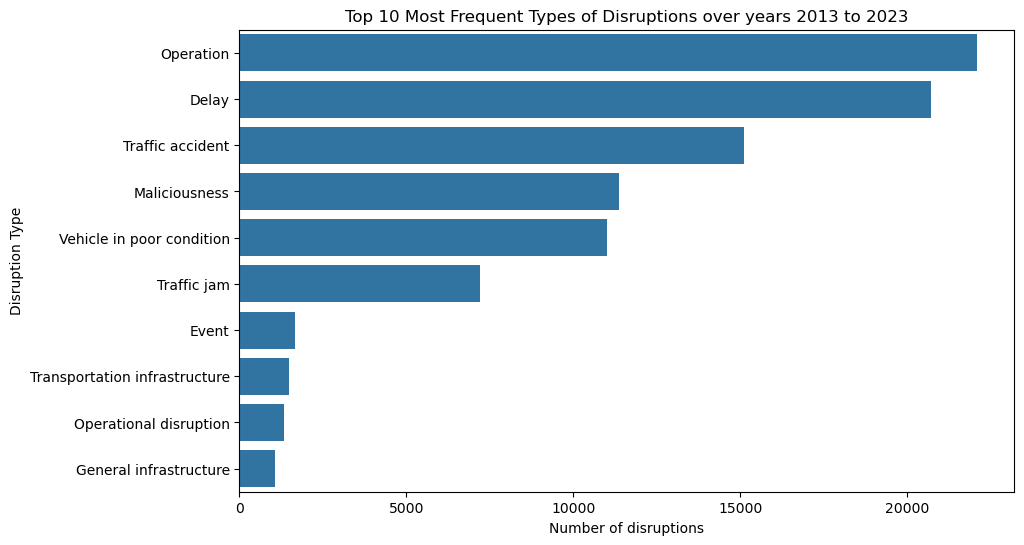

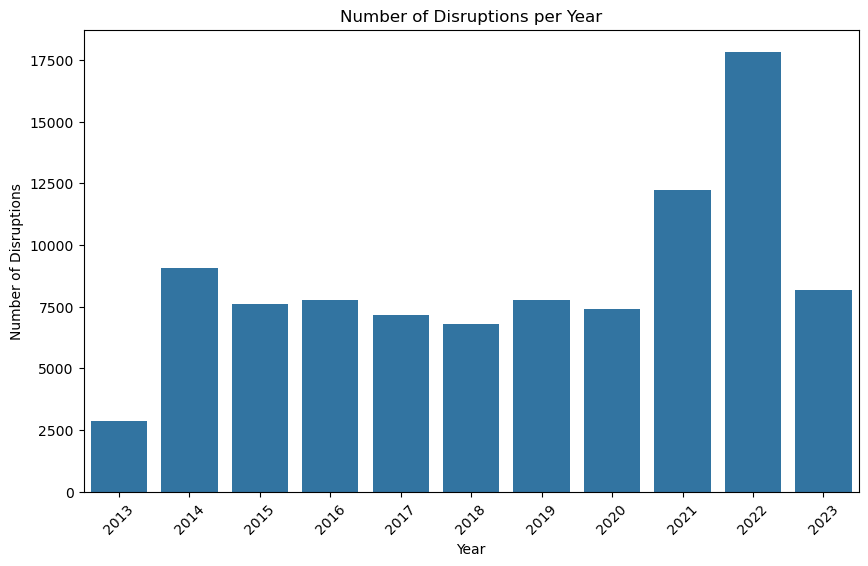

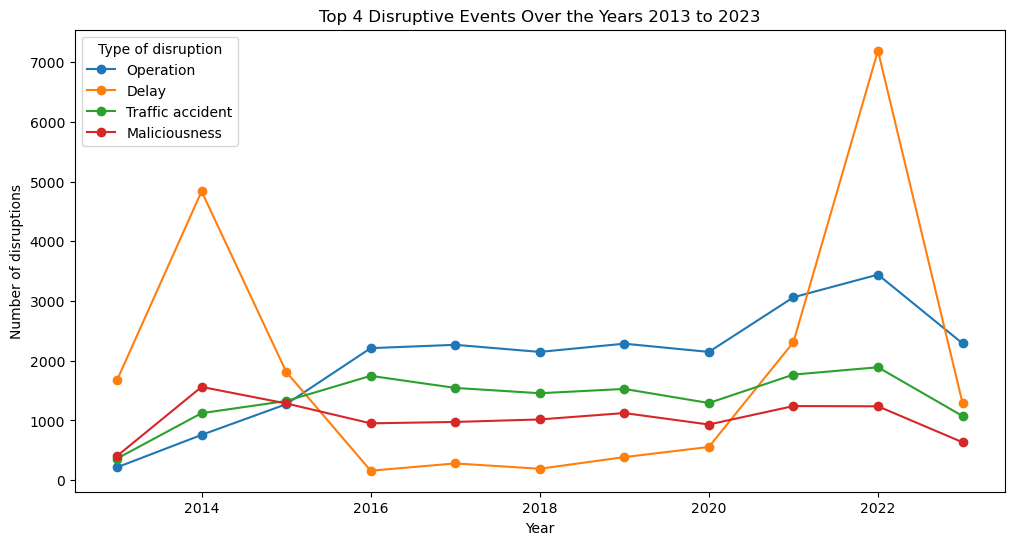

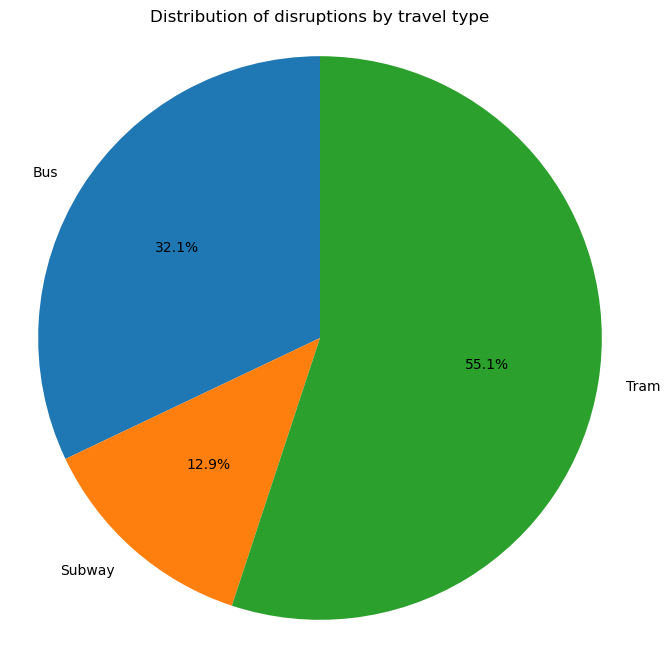

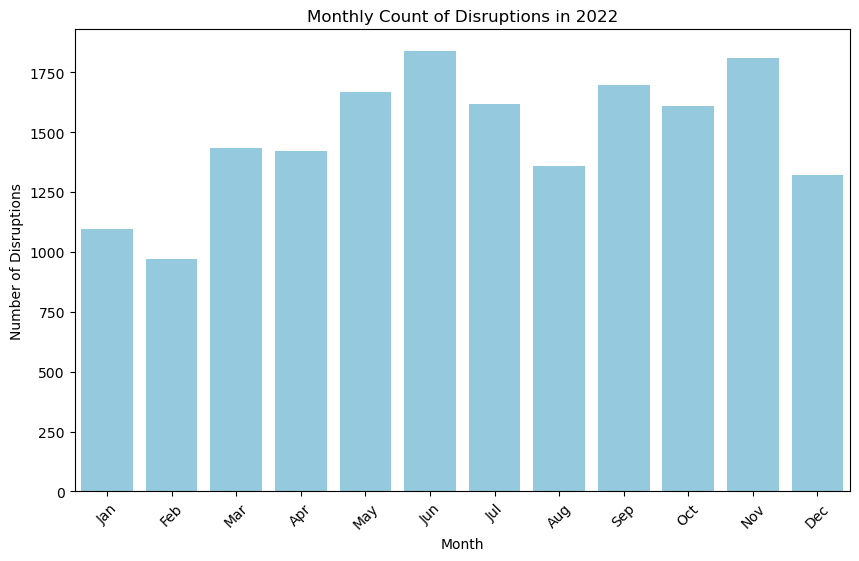

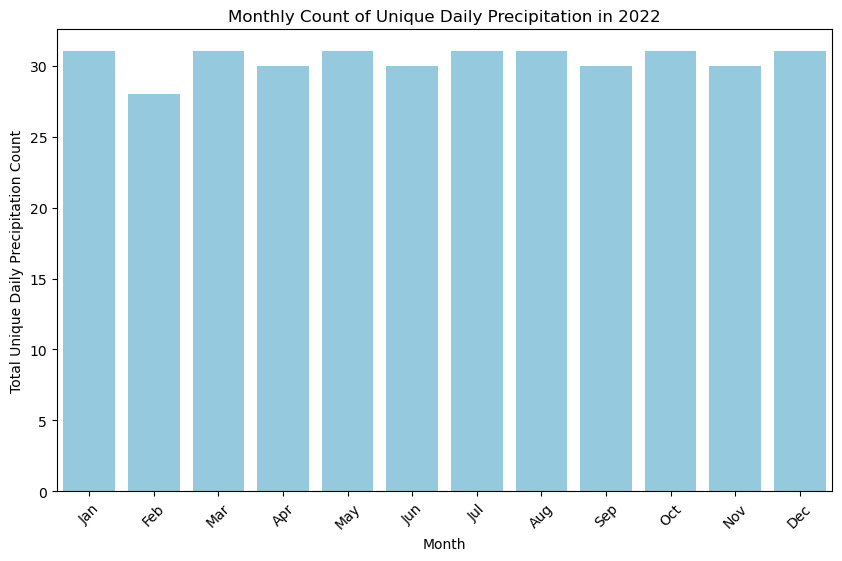

In [8]:
display(data_processed.columns)

#1
top_disruptions = data_processed['disruption'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_disruptions.values, y=top_disruptions.index)
plt.title("Top 10 Most Frequent Types of Disruptions over years 2013 to 2023")
plt.xlabel("Number of disruptions")
plt.ylabel("Disruption Type")
plt.show()

#2
yearly_disruptions = data_processed.groupby('year')['disruption'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='disruption', data=yearly_disruptions)
plt.title("Number of Disruptions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disruptions")
plt.xticks(rotation=45)
plt.show()


#3
disruption_counts = data_processed.groupby(['year', 'disruption']).size().unstack(fill_value=0)
top_disruptions = disruption_counts.sum().nlargest(4).index
top_disruption_counts = disruption_counts[top_disruptions]
top_disruption_counts.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Top 4 Disruptive Events Over the Years 2013 to 2023")
plt.xlabel("Year")
plt.ylabel("Number of disruptions")
plt.legend(title="Type of disruption")
plt.show()

#4 Pie chart based on number of distruption in every travel type
bus_disruptions = data_processed[data_processed['bus'] == 1].shape[0]
subway_disruptions = data_processed[data_processed['subway'] == 1].shape[0]
tram_disruptions = data_processed[data_processed['tram'] == 1].shape[0]

labels = ['Bus', 'Subway', 'Tram']
sizes = [bus_disruptions, subway_disruptions, tram_disruptions]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of disruptions by travel type')
plt.show()


"""
bus_disruptions = data_processed[data_processed['bus'] == 1]['disruption'].value_counts().nlargest(5)

subway_disruptions = data_processed[data_processed['subway'] == 1]['disruption'].value_counts().nlargest(5)

tram_disruptions = data_processed[data_processed['tram'] == 1]['disruption'].value_counts().nlargest(5)

# Step 2: Prepare data for the pie chart
# Create a DataFrame to combine counts
combined_disruptions = pd.DataFrame({
    'Bus': bus_disruptions,
    'Subway': subway_disruptions,
    'Tram': tram_disruptions
}).dropna()

# Ensure counts are integers
combined_disruptions = combined_disruptions.astype(int)

# Step 3: Create pie charts for each travel mode in a column layout
fig, axs = plt.subplots(3, 1, figsize=(8, 18))  # 3 rows, 1 column, adjust figsize as needed

# Pie chart for Bus Disruptions
axs[0].pie(combined_disruptions['Bus'], labels=combined_disruptions.index, autopct=lambda p: f'{p:.1f}%' if p > 200 else '', startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Bus Disruptions by Type (Top 3)')

# Pie chart for Subway Disruptions
axs[1].pie(combined_disruptions['Subway'], labels=combined_disruptions.index, autopct=lambda p: f'{p:.1f}%' if p > 200 else '', startangle=90)
axs[1].axis('equal')
axs[1].set_title('Subway Disruptions by Type (Top 3)')

# Pie chart for Tram Disruptions
axs[2].pie(combined_disruptions['Tram'], labels=combined_disruptions.index, autopct=lambda p: f'{p:.1f}%' if p > 200 else '', startangle=90)
axs[2].axis('equal')
axs[2].set_title('Tram Disruptions by Type (Top 3)')

# Show the pie charts
plt.tight_layout()
plt.show()
"""


#6
yearly_disruptions = data_processed.groupby(['year', 'month'])['disruption'].count().reset_index()
disruptions_2022 = yearly_disruptions[yearly_disruptions['year'] == 2022]
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='disruption', data=disruptions_2022, color='skyblue')
plt.title("Monthly Count of Disruptions in 2022")
plt.xlabel("Month")
plt.ylabel("Number of Disruptions")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


#7
daily_precipitation = data_processed.groupby(['year', 'month', 'day'])['precip'].nunique().reset_index(name='unique_precipitation')
monthly_precipitation = daily_precipitation.groupby(['year', 'month'])['unique_precipitation'].sum().reset_index()
precipitation_2022 = monthly_precipitation[monthly_precipitation['year'] == 2022]
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='unique_precipitation', data=precipitation_2022, color='skyblue')
plt.title("Monthly Count of Unique Daily Precipitation in 2022")
plt.xlabel("Month")
plt.ylabel("Total Unique Daily Precipitation Count")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


# I think delays are correlated with operation disruptions since if there is any operation disruption (police, ambulance..) tram/bus/subway need to stop in order to solve
# the situation


In [11]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

# Classification models

## Task 7: Model for disruption class prediction (25 Points)

Build and train a model using weather and traffic data from 2013 until 2023 (incl.) using `scikit-learn`.

You have to do the following steps:

1. Create train, validation, and test splits - **2**
1. First ML experiments - **2**
1. Explore the different metrics - **3**
1. Explore different scaling approaches - **3**
1. Experiment with different train/valid splits - **3**
1. Experiment with different feature selection methods - **3**
1. Try out different ML algorithms - **3**
1. Explore the effect of parameters with 10-fold cross-validation - **3**
1. Present your best performing results - **3**

General advices: Make sure your results are reproducible. You can use your student ID as seed.

### 7.1 Create train, validation, and test splits

First, we need to create a dataset that will be used to train a model. 

Due to performance reasons we only use a fraction of the overall data set for our computations.

In [66]:
def sample_data(df: pd.DataFrame, fraction: float = 0.7) -> pd.DataFrame:
    """
    Sample a fraction of the data.
    """
    
    data_shortened = df.copy()
    data_shortened = data_processed.sample(frac=fraction, random_state=student_id)
    
    # we drop disruption since it is mapped to our new target variable 'class'
    data_shortened = data_shortened.drop(columns=['disruption']) 
    # Convert entries in the `duration` column from `Timedelta` to floating-point number `numpy.float64`, so that this column can be also used as a feature to train a classifier:
    data_shortened['duration'] = (data_shortened['duration'] - data_shortened['duration'].min())  / np.timedelta64(1,'D')
    return data_shortened

data_shortened = sample_data(data_processed)
data_shortened.head()

,,,temp_dailyMin,temp_dailyMax,temp_dailyMean,temp_dailyMedian,hum_dailyMin,hum_dailyMax,hum_dailyMean,wind_dailyMin,wind_dailyMax,wind_dailyMean,precip,bus,subway,tram,duration,class
year,month,day,,,,,,,,,,,,,,,,
2021,7,20,16.6,23.8,20.366667,20.7,42,68,51.000000,3,3,3.000000,0.0,True,False,False,0.075000,7
2017,11,29,1.1,2.8,1.800000,1.5,91,95,93.000000,1,3,2.000000,10.7,False,False,True,0.162500,7
2021,3,2,-1.5,8.1,3.900000,5.1,66,95,81.333333,1,1,1.000000,0.0,False,False,True,0.069444,11
2018,6,19,21.7,27.6,24.866667,25.3,37,49,42.333333,3,3,3.000000,0.0,True,False,False,0.027778,11
2017,2,20,3.6,8.7,5.700000,4.8,66,82,76.666667,1,4,2.666667,4.0,False,False,True,0.011806,7


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Split the `data_shortened` DataFrame into train (this will be further split to train and validation) and test sets.
- Train & validation set: 80% of the overall data set
- Test set: remaining 20% of the data

In [67]:
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size: float=0.2,target_column: str = 'class') -> typing.Tuple[pd.DataFrame, pd.DataFrame]:

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=student_id)

    return df_train, df_test

In [68]:
data_train, data_test = split_data(data_shortened)

In [69]:
assert data_train.shape[1] == data_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_train.shape[1] == data_shortened.shape[1], "All columns should be retained!!"
assert data_train.shape[0] < data_shortened.shape[0], "data_train should be a subset of data_shortened, so it should have less rows!"
assert data_test.shape[0] < data_shortened.shape[0], "data_test should be a subset of data_shortened, so it should have less rows!"

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat our test dataset as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.
* Split the `data_train` into train and validation sets. 
* Separate the features from the target attribute to predict (type of disruption: `class`). `X_` valiables should contain features whily `y_` variables contain the target values.

Reminder: Do not use imports other than those from Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn.


In [70]:
def create_dataset(df:pd.DataFrame, valid_size:float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    target_column = 'class'
    
    df_train, df_valid = train_test_split(df, test_size=valid_size, random_state=random_state)
    
    X_train = df_train.drop(columns=[target_column])
    y_train = df_train[target_column]
    
    X_valid = df_valid.drop(columns=[target_column])
    y_valid = df_valid[target_column]
    
    return X_train, y_train, X_valid, y_valid

In [71]:
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_train, valid_size=valid_split, random_state=student_id)

In [72]:
X_train

temp_dailyMin  temp_dailyMax  temp_dailyMean  \
year month day                                                 
2022 11    19            -1.0            0.2       -0.200000   
2021 3     31            10.8           23.0       17.466667   
2018 9     5             19.0           25.7       21.566667   
2022 5     17            16.2           19.8       17.433333   
2021 10    28             4.7           13.6        9.366667   
...                       ...            ...             ...   
2022 3     23             3.0           19.6       12.033333   
     4     7             10.6           18.6       15.400000   
2017 8     16            22.0           27.1       24.466667   
2014 3     31             7.9           19.7       14.600000   
2022 3     1             -2.8            6.1        2.000000   

                temp_dailyMedian  hum_dailyMin  hum_dailyMax  hum_dailyMean  \
year month day                                                                
2022 11    19                0.2            73            87      79.000000   
2021 3     31               18.6            37            63      49.000000   
2018 9     5                20.0            41            74      60.333333   
2022 5     17               16.3            71            93      81.000000   
2021 10    28                9.8            50            97      71.666667   
...                          ...           ...           ...            ...   
2022 3     23               13.5            19            53      32.000000   
     4     7                17.0            38            84      55.000000   
2017 8     16               24.3            45            67      57.000000   
2014 3     31               16.2            39            87      57.333333   
2022 3     1                 2.7            40            71      53.333333   

                wind_dailyMin  wind_dailyMax  wind_dailyMean  precip    bus  \
year month day                                                                
2022 11    19               1              2        1.666667    0.30   True   
2021 3     31               0              2        1.333333    0.00  False   
2018 9     5                2              2        2.000000    0.00   True   
2022 5     17               3              4        3.666667    1.30  False   
2021 10    28               2              4        3.000000    0.00  False   
...                       ...            ...             ...     ...    ...   
2022 3     23               2              2        2.000000    0.00  False   
     4     7                3              4        3.333333    0.01  False   
2017 8     16               2              4        3.000000    0.00  False   
2014 3     31               1              3        2.000000    0.00   True   
2022 3     1                2              2        2.000000    0.00  False   

                subway   tram  duration  
year month day                           
2022 11    19    False  False  0.017361  
2021 3     31    False   True  0.133333  
2018 9     5     False  False  0.186806  
2022 5     17    False   True  0.102083  
2021 10    28     True  False  0.035417  
...                ...    ...       ...  
2022 3     23    False   True  0.290278  
     4     7     False   True  0.093750  
2017 8     16    False   True  0.037500  
2014 3     31    False  False  0.041667  
2022 3     1     False   True  0.130556  

[42406 rows x 15 columns]

In [73]:
# Tests
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_valid, pd.DataFrame)

assert isinstance(y_train, pd.Series)
assert isinstance(y_valid, pd.Series)

assert X_train.shape[0] <= data_train.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_train.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1
assert len(y_valid.shape) == 1

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.2 First ML experiments

#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the model should be.

- Identify **at least three** (see https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suitable ML methods from sklearn and add them to the list in the code block below.

In [181]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

suitable_ml_methods = [KNeighborsClassifier, LinearSVC, SVC]

In [158]:
def print_selection(selected: list, sel_type:str='methods'):
  print(f"Identified {sel_type}:\n===================\n"+ 
        '\n'.join([cur_sel.__name__ for cur_sel in selected]))

In [159]:
print_selection(suitable_ml_methods)

Identified methods:
RandomForestClassifier
KNeighborsClassifier
LinearSVC
SVC


In [152]:
# Tests

assert len(suitable_ml_methods) >= 3

assert np.all([cur_method.__module__.startswith('sklearn')  \
          for cur_method in suitable_ml_methods]), \
          "Only use classes from sklearn!"

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Train a ML model

Now that we have identified suitable methods, let's train a model! Implement two functions:
- Train a ML method on the train subset (`X_train`, `y_train`) and return the trained model.
- Use the trained model to predict the validation subset (`X_valid`) and return the predictions.
- Your trained model should be better than our hidden baseline model (don't worry, it's not a strong one!)

In [180]:
def train_model(model_type: type, X_train:pd.DataFrame, y_train:pd.DataFrame) -> sklearn.base.ClassifierMixin:

    trained_model = RandomForestClassifier()
    
    trained_model.fit(X_train, y_train)

    return trained_model

def predict_disruption_type(trained_model: sklearn.base.ClassifierMixin, X_valid:pd.DataFrame) -> np.ndarray:
    
    y_pred = trained_model.predict(X_valid)
    
    return y_pred

In [161]:
model_idx = 0  # you can choose different models from the list of suitable models here
choosen_model_class = suitable_ml_methods[model_idx]
print(f"Choosen model: {choosen_model_class.__name__}")

Choosen model: RandomForestClassifier


In [162]:
trained_model = train_model(choosen_model_class, X_train, y_train)
y_pred = predict_disruption_type(trained_model, X_valid)

In [163]:
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.3 Explore different metrics

In order to quantify the quality of the trained model we need a metric to  calculate performance.
Similarly as above with the ML methods, please identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
suitable_metrics = [accuracy_score,precision_score,recall_score,f1_score]

In [165]:
print_selection(suitable_metrics, 'metrics')

Identified metrics:
accuracy_score
precision_score
recall_score
f1_score


In [84]:
# Tests

assert len(suitable_metrics) >= 3

assert np.all([cur_metric.__module__.startswith('sklearn')  \
          for cur_metric in suitable_metrics]), \
          "Only use classes from sklearn!"

assert np.all([callable(cur_metric) \
        for cur_metric in suitable_metrics]), \
        "Metrics must be functions"

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Now calculate the metrics for the given validation data.
- Use the predictions from the previous experiment and calculate the values of the different metrics in `suitable_metrics`.  
- Return these scores as a dictionary with metric names as keys and the performance values as values. 

In [169]:
def compare_metrics(y_true:pd.DataFrame, y_pred:pd.DataFrame) -> dict:
  scores = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "f1_score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
  }

  return scores

In [167]:
def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [168]:
metrics_scores = compare_metrics(y_valid, y_pred)
print_scores(metrics_scores)


Scores:
accuracy: 0.34729296359177514
precision: 0.3305589755195324
recall: 0.34729296359177514
f1_score: 0.33774869017264086


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.4 Explore different scaling approaches
For some machine learning methods, the value range of the feature data can have a huge impact. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so-called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Try and compare three different scaling methods.
- Compare the scores and check if it makes a difference.

In [223]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class:type, 
                    scaler_class:type, 
                    metric_func:type):
  # build a sklearn pipeline using the scaler and the model 
  # train the pipeline, and predict on the valid data
  # calculate the performance using the metric_func on the predictions and y_valid
  # return the calculated performance

  pipeline = make_pipeline(scaler_class(), model_class())
  pipeline.fit(X_train, y_train)
  
  y_pred = pipeline.predict(X_valid)
    
  score = metric_func(y_valid, y_pred)
  return score

def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    metric_func: type):
    scores = {}
    
    for scaler_name, scaler in zip(
        ["StandardScaler", "MinMaxScaler", "RobustScaler"], 
        [StandardScaler, MinMaxScaler, RobustScaler]
    ):
        score = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, scaler, metric_func)
        scores[scaler_name] = score

    return scores

In [224]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: KNeighborsClassifier
Choosen metric: accuracy_score


In [225]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.3455951707225052
MinMaxScaler: 0.34521788341822296
RobustScaler: 0.3350311262026033


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [212]:
from sklearn.pipeline import make_pipeline

def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type, 
                    metric_func:type):
  # build a sklearn pipeline using the scaler and the model 
  # train the pipeline, and predict on the valid data
  # calculate the performance using the metric_func on the predictions and y_valid
  # return the calculated performance
    
  pipeline = make_pipeline(scaler_class(), model_class())
  pipeline.fit(X_train, y_train)

  y_pred = pipeline.predict(X_valid)
   
  score = metric_func(y_valid, y_pred)
  return score
    
    
def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    metric_func: type):
    scores = {}

    for scaler_name, scaler in zip(
        ["StandardScaler", "MinMaxScaler", "RobustScaler"], 
        [StandardScaler, MinMaxScaler, RobustScaler]
    ):
        score = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, scaler, metric_func)
        scores[scaler_name] = score

    return scores

In [213]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: KNeighborsClassifier
Choosen metric: accuracy_score


In [222]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.3455951707225052
MinMaxScaler: 0.34521788341822296
RobustScaler: 0.3350311262026033


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.5 Experiment with different train/valid splits

Try out **at least 4 different train-valid splits**. 
- Use the `data_train` DataFrame as input.
- Use splits other than those in Section 7.1.
- Choose one ML algorithm (e.g. from Section 7.1) and one metric from Section 7.3.
- Evaluate the performance of the different splits.
- Return these scores as a dict with a name of the train-valid split as keys and the score as values.

Hint: you can re-use the `create_dataset` function from Section 7.1.

In [237]:
from sklearn.neighbors import KNeighborsClassifier


def compare_train_valid_splits(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    splits = [0.1 ,0.15 ,0.2, 0.25, 0.3, 0.35,0.4]

    
    for valid_size in splits:
        X_train, y_train, X_valid, y_valid = create_dataset(df, valid_size, random_state=student_id)
        
        model = KNeighborsClassifier
        scaler = StandardScaler
        metric = accuracy_score
        
        scaling_score = fit_pipeline(X_train, y_train, X_valid, y_valid, model, scaler, metric)
        
        scores[f'train-valid split {1 - valid_size:.2f}-{valid_size:.2f}'] = scaling_score

    return scores

In [238]:
split_scores = compare_train_valid_splits(data_train)

print_scores(split_scores)


Scores:
train-valid split 0.90-0.10: 0.34484059611394074
train-valid split 0.85-0.15: 0.34293259557344064
train-valid split 0.80-0.20: 0.3455951707225052
train-valid split 0.75-0.25: 0.34387262300030186
train-valid split 0.70-0.30: 0.34106772307111866
train-valid split 0.65-0.35: 0.33455505848110817
train-valid split 0.60-0.40: 0.33045651763818146


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.6 Experiment with different feature selection methods

- Explore **at least 2 different feature selection methods** from `sklearn.feature_selection` and evaluate a baseline ML setup (e.g. the same setup as in Section 7.5). 
- Use the original train-valid split from Section 7.2.
- Return the scores as a dict with the features selections name as string keys and the scores as values.

In [247]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
, RFE
from sklearn.linear_model import LogisticRegression

def compare_feature_selection(X_train:pd.DataFrame, 
                              X_valid:pd.DataFrame, 
                              y_train:pd.DataFrame, 
                              y_valid:pd.DataFrame) -> typing.Dict[str, float]:

  scores = {}

  k_best = SelectKBest(score_func=f_classif, k=10)  # Select top 5 features
  X_train_kbest = k_best.fit_transform(X_train, y_train)
  X_valid_kbest = k_best.transform(X_valid)
    
  knn_kbest = KNeighborsClassifier(n_neighbors=10)
  knn_kbest.fit(X_train_kbest, y_train)
  y_pred_kbest = knn_kbest.predict(X_valid_kbest)
  scores['SelectKBest'] = accuracy_score(y_valid, y_pred_kbest)

  selector = VarianceThreshold(threshold=0.05)
  X_train_variance = selector.fit_transform(X_train)
  X_valid_variance = selector.transform(X_valid)
    
  knn_variance = KNeighborsClassifier(n_neighbors=10)
  knn_variance.fit(X_train_variance, y_train)
  y_pred_variance = knn_variance.predict(X_valid_variance)
  scores['VarianceThreshold'] = accuracy_score(y_valid, y_pred_variance)
    
  return scores

In [248]:
feat_sel_scores = compare_feature_selection(X_train, X_valid, y_train, y_valid)

print_scores(feat_sel_scores)


Scores:
SelectKBest: 0.3409734012450481
VarianceThreshold: 0.3393699302018487


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.7 Try out different ML algorithms

- Try out **at least 3 ML methods**.
- Use the original train-valid split from Section 7.2.
- If your chosen algorithm has specific parameters, explore their effect by using 10-fold cross-validation.
- Evaluate the performance of the different methods.
- Return these scores as a list.

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid, cross_val_score

def compare_methods(X_train:pd.DataFrame, X_valid:pd.DataFrame, 
                    y_train:pd.DataFrame, y_valid:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    
    models = {
        'RandomTreeClassifier': RandomForestClassifier(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'SGDClassifier': SGDClassifier(max_iter=1000)
    }
    
    for model_name, model in models.items():
        cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        validation_score = accuracy_score(y_valid, y_pred)
        
        scores[model_name] = {
            'cv_score': cv_score,
            'validation_score': validation_score
        }
    
    return scores

In [240]:
diff_methods_scores = compare_methods(X_train, X_valid, y_train, y_valid)

print_scores(diff_methods_scores)


Scores:
RandomTreeClassifier: {'cv_score': 0.33224063833289585, 'validation_score': 0.34333144689681194}
DecisionTreeClassifier: {'cv_score': 0.27826285852838195, 'validation_score': 0.28919071873231467}
SGDClassifier: {'cv_score': 0.21954367295004298, 'validation_score': 0.1753442746651575}


In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.8 Explore the effect of parameters with 10-fold cross-validation

- Choose an algorithm from Section 7.7 that has specific parameters. 
- Explore the effect of these parameters by using 10-fold cross-validation.
- Use the whole `data_train` DataFrame.
- Do this for at least 3 different parameters.
- For each parameter try 2-3 different values.
- Evaluate the performance of the different settings by comparing the mean scores.
- Return these scores as a list.

In [271]:
def compare_param_effect(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}

    X = df.drop(columns=['class'])
    y = df['class']
    
    param_grid = {
        'n_estimators': [10,50],
        'max_depth': [10,20],
        'min_samples_split': [5,10]
    }

    for param, values in param_grid.items():
        for value in values:
            model = RandomForestClassifier(**{param: value}, random_state=student_id)
        
            cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
            
            mean_score = cv_scores.mean()
            
            scores[f"{param}={value}"] = mean_score

    return scores

In [272]:
param_effect_scores = compare_param_effect(data_train)

print_scores(param_effect_scores)


Scores:
n_estimators=10: 0.3321198385495083
n_estimators=50: 0.33706241257434516
max_depth=10: 0.35175822290561054
max_depth=20: 0.35734253060120375
min_samples_split=5: 0.3585120002277961
min_samples_split=10: 0.36730308984064947


In [ ]:
assert len(param_effect_scores) >= 3

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.9 Present your best-performing training results

- Look back to all the experiments above and figure it out which setup has the best performance.
- Visualize how the predictions differ from the ground truth.

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [267]:
# best configuration

valid_split = 0.2
param = "gini" 
model = RandomForestClassifier(random_state=student_id, criterion=param) # KNN was also good but more computationally expensive
scaler = StandardScaler()
method = accuracy_score
features = ['temp_dailyMean', 'hum_dailyMin', 'hum_dailyMax', 'hum_dailyMean', 'bus', 'subway', 'tram']
X = data_train[features]
y = data_train["class"]

def extract_val_data(X, y, valid_split, random_state):

    X_train, y_train, X_valid, y_valid = train_test_split(X,y,test_size=valid_split,random_state=random_state,stratify=y)
    return X_train, y_train, X_valid, y_valid

# predictions
def fit(scaler, model, method, X, y, valid_split, random_state):

    X_train, y_train, X_valid, y_valid = extract_val_data(X,y,valid_split,random_state)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    
    model.fit = model.predict(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    
    return y_pred

y_pred = fit(scaler, model, method, X, y, valid_split, 42)
y_true = y_valid.values

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [268]:
y_pred = label_encoder.inverse_transform(y_pred)
y_true = label_encoder.inverse_transform(y_true)

NameError: name 'label_encoder' is not defined

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [269]:
from sklearn.metrics import classification_report  

# Generate the classification report with disruption names
disruptions = data_processed['disruption'].unique()
report = classification_report(y_true,y_pred,target_names=disruptions)

print(report)

NameError: name 'y_true' is not defined

In [270]:
from sklearn.metrics import multilabel_confusion_matrix

confusion_metrix = confusion_metrix(y_true,y_pred)

NameError: name 'confusion_metrix' is not defined

In [ ]:
labels = data_processed['disruption'].unique()

# Plot the confusion matrix that was generated in the cell before in a nice format. Each class should have its own representation.

def plot_confusion_matrix(cm, class_name):
    
    raise NotImplementedError()

for class_name in labels:
    class_index = data_processed[data_processed['disruption'] == class_name]['class'].iloc[0]
    class_cm = cm[class_index, :, :]
    plot_confusion_matrix(class_cm, class_name)

## Task 8: Test model on unknown data (5 Points)

Use the test data created in Section 7.1 and predict traffic disruptions for this data using the best model you found on the training data.

In [ ]:
data_test.info()

In [ ]:
disruption_types = data_processed['class'].unique()
disruption_types

### 8.1 Train & predict with best model

Set your best model

In [ ]:
best_model = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert isinstance(best_model, sklearn.pipeline.Pipeline) or isinstance(best_model,tuple(all_methods))

In [ ]:
def train_and_predict(best_model, train_data: pd.DataFrame, test_data: pd.DataFrame):
  predictions = None
  #probabilities = None
  # YOUR CODE HERE
  raise NotImplementedError()
  return predictions #, probabilities

In [ ]:
# train with train data, predict on hidden test data. For hidden test data, we do not provide the weekly_infections values, of course!
unknown_prediction = train_and_predict(best_model, data_train, data_test.drop('class', axis=1)) 

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

In [ ]:
disruption_preds = np.unique(unknown_prediction)
disruption_preds

In [ ]:
assert len(unknown_prediction.shape) == 1, "Predictions should only have 1 column!"
assert unknown_prediction.shape[0] == data_test.shape[0], "Predictions should have the same number of columns as test data!"

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!



### 8.2 Visualize Results

* Present the model performance on the test dataset by using one or more metrics from Section 7.3. 
* Use two meaningful representations for the results, e.g. classification report and confusion matrix.

In [ ]:
# First plot
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Second plot
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!